In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

temp = pd.read_csv('/content/drive/MyDrive/train_temp.csv')
humid = pd.read_csv('/content/drive/MyDrive/train_humidity.csv')

temp.info(), humid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _start        2924 non-null   object 
 1   _stop         2924 non-null   object 
 2   _time         2924 non-null   object 
 3   _value        2924 non-null   float64
 4   _field        2924 non-null   object 
 5   _measurement  2924 non-null   object 
dtypes: float64(1), object(5)
memory usage: 137.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _start        2924 non-null   object 
 1   _stop         2924 non-null   object 
 2   _time         2924 non-null   object 
 3   _value        2924 non-null   float64
 4   _field        2924 non-null   object 
 5   _measurement  2924 non-null   object 
dtypes: float64(1), object(5)
memory usage: 13

(None, None)

In [ ]:
# Extract and rename the columns as per the requirement
temp['datetime'] = pd.to_datetime(temp['_time'])
temp['temp'] = temp['_value']

humid['humidity'] = humid['_value']
humid['datetime'] = pd.to_datetime(temp['_time'])

# Merge the datasets on the datetime column
combined_dataset = pd.merge(temp[['datetime', 'temp']], humid[['datetime', 'humidity']], on='datetime')

# Display the first few rows of the combined dataset
combined_dataset.head()

,datetime,temp,humidity
0,2024-05-08 05:13:15+00:00,39.37,48.23
1,2024-05-08 05:14:15+00:00,38.20,50.07
2,2024-05-08 05:15:15+00:00,38.59,48.96
3,2024-05-08 05:15:45+00:00,38.64,48.77
4,2024-05-08 05:16:45+00:00,38.77,48.61


In [ ]:
# # Save to CSV
# combined_dataset.to_csv('output.csv', index=False)
combined_dataset.head()

,datetime,temp,humidity
0,2024-05-08 05:13:15+00:00,39.37,48.23
1,2024-05-08 05:14:15+00:00,38.20,50.07
2,2024-05-08 05:15:15+00:00,38.59,48.96
3,2024-05-08 05:15:45+00:00,38.64,48.77
4,2024-05-08 05:16:45+00:00,38.77,48.61


In [ ]:
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   datetime  2924 non-null   datetime64[ns, UTC]
 1   temp      2924 non-null   float64            
 2   humidity  2924 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2)
memory usage: 68.7 KB


### **Data preprocessing**

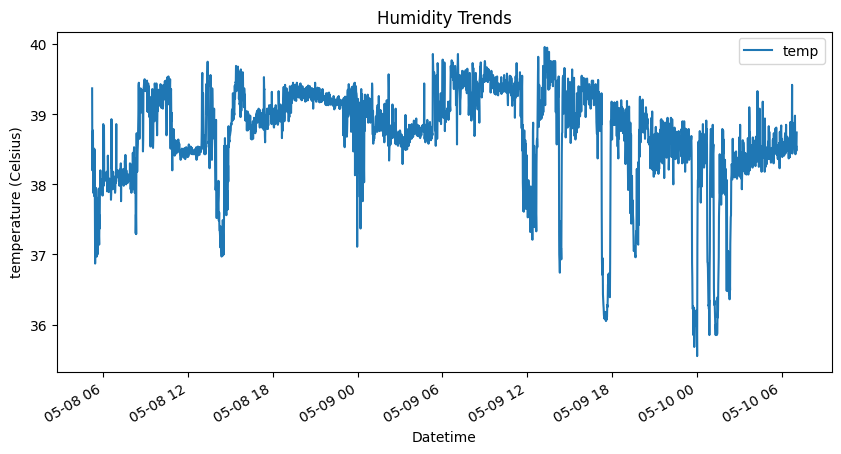

In [ ]:
import matplotlib.pyplot as plt

combined_dataset.plot(x='datetime', y=['temp'], figsize=(10, 5))
plt.title('Humidity Trends')
plt.xlabel('Datetime')
plt.ylabel('temperature (Celsius)')
plt.show()

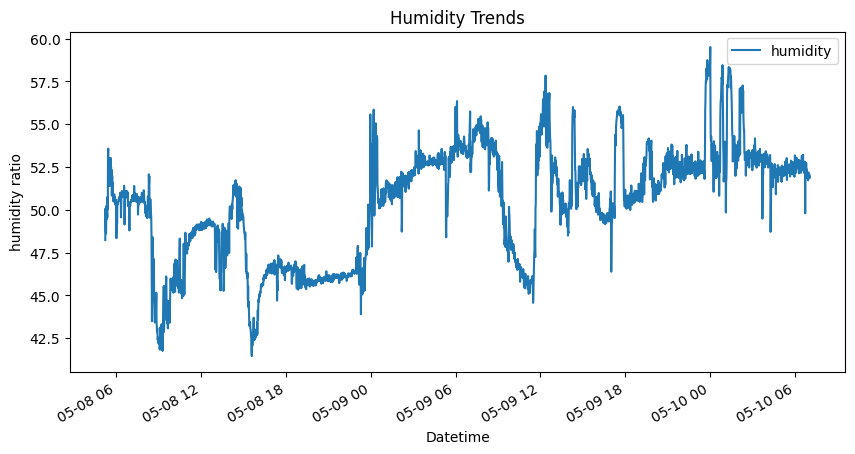

In [ ]:
combined_dataset.plot(x='datetime', y='humidity', figsize=(10, 5))
plt.title('Humidity Trends')
plt.xlabel('Datetime')
plt.ylabel('humidity ratio')
plt.show()

### **Correlation**

              temp  humidity
temp      1.000000 -0.569707
humidity -0.569707  1.000000


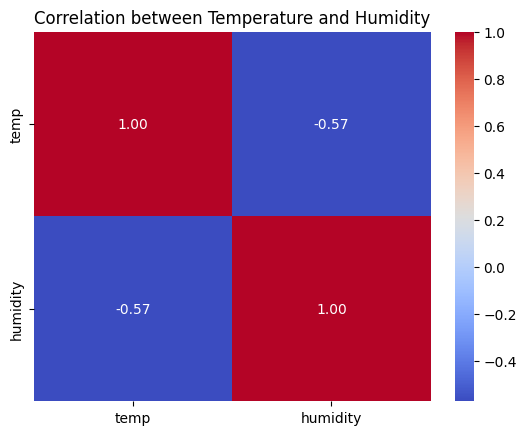

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = combined_dataset[['temp', 'humidity']].corr()
print(correlation_matrix)

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Temperature and Humidity')
plt.show()

### **Autocorrelation plot**

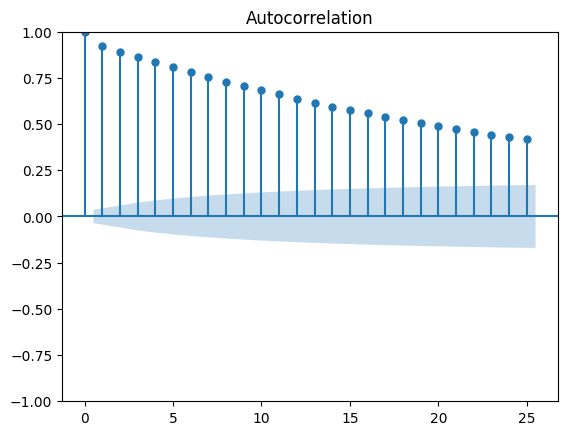

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Load your data
df = pd.DataFrame(combined_dataset)

# Convert the 'datetime' column to datetime type if necessary
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Assume 'value' is the column you want to analyze
time_series = df['temp']

# Plot autocorrelation
plot_acf(time_series, lags=25)  # Change lags as needed based on the frequency and nature of your data
plt.show()

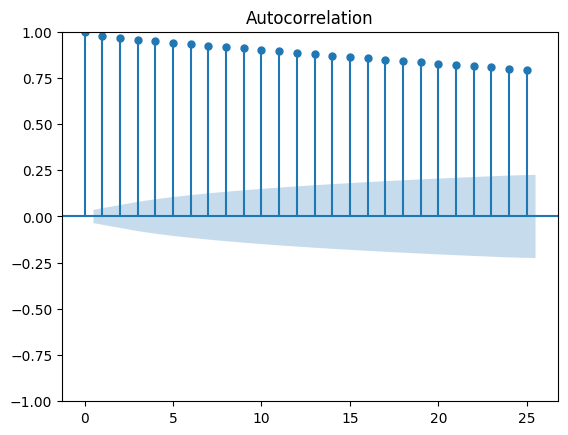

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Load your data
df = pd.DataFrame(combined_dataset)

# Convert the 'datetime' column to datetime type if necessary
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Assume 'value' is the column you want to analyze
time_series = df['humidity']

# Plot autocorrelation
plot_acf(time_series, lags=25)  # Change lags as needed based on the frequency and nature of your data
plt.show()

In [163]:
for lag in [1, 2, 3, 5, 10]:  # Start with these lags
    df[f'temp_lag_{lag}'] = df['temp'].shift(lag)
for lag in [1, 2, 3, 5, 10]:  # Start with these lags
    df[f'humidity_lag_{lag}'] = df['humidity'].shift(lag)
df

,temp,humidity,temp_lag_1,temp_lag_2,temp_lag_3,temp_lag_5,temp_lag_10,humidity_lag_1,humidity_lag_2,humidity_lag_3,humidity_lag_5,humidity_lag_10
datetime,,,,,,,,,,,,
2024-05-08 05:13:15+00:00,39.37,48.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-08 05:14:15+00:00,38.20,50.07,39.37,NaN,NaN,NaN,NaN,48.23,NaN,NaN,NaN,NaN
2024-05-08 05:15:15+00:00,38.59,48.96,38.20,39.37,NaN,NaN,NaN,50.07,48.23,NaN,NaN,NaN
2024-05-08 05:15:45+00:00,38.64,48.77,38.59,38.20,39.37,NaN,NaN,48.96,50.07,48.23,NaN,NaN
2024-05-08 05:16:45+00:00,38.77,48.61,38.64,38.59,38.20,NaN,NaN,48.77,48.96,50.07,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-10 06:59:30+00:00,38.52,52.07,38.43,38.50,38.98,38.81,38.64,52.18,52.17,51.72,51.95,52.20
2024-05-10 07:00:30+00:00,38.51,51.84,38.52,38.43,38.50,38.62,38.57,52.07,52.18,52.17,51.83,52.09
2024-05-10 07:01:30+00:00,38.55,52.07,38.51,38.52,38.43,38.98,38.53,51.84,52.07,52.18,51.72,52.35


In [164]:
import pandas as pd

# Load your dataset
df = pd.DataFrame(combined_dataset)

# Convert datetime if it exists and is not in datetime format already
# df['datetime'] = pd.to_datetime(df['datetime'])

# Creating lag features for temperature and humidity
for lag in [1, 2, 3, 4 ,5,6,7]:
    df[f'temp_lag_{lag}'] = df['temp'].shift(lag)
    df[f'humidity_lag_{lag}'] = df['humidity'].shift(lag)

# Remove rows with NaN values that result from lagging
df.dropna(inplace=True)

                    temp  humidity_lag_1  humidity_lag_2  humidity_lag_3  \
temp            1.000000       -0.531864       -0.513218       -0.498707   
humidity_lag_1 -0.531864        1.000000        0.978108        0.966651   
humidity_lag_2 -0.513218        0.978108        1.000000        0.978067   
humidity_lag_3 -0.498707        0.966651        0.978067        1.000000   
humidity_lag_4 -0.482209        0.957598        0.966617        0.978067   
humidity_lag_5 -0.466869        0.949197        0.957571        0.966614   

                humidity_lag_4  humidity_lag_5  
temp                 -0.482209       -0.466869  
humidity_lag_1        0.957598        0.949197  
humidity_lag_2        0.966617        0.957571  
humidity_lag_3        0.978067        0.966614  
humidity_lag_4        1.000000        0.978067  
humidity_lag_5        0.978067        1.000000  


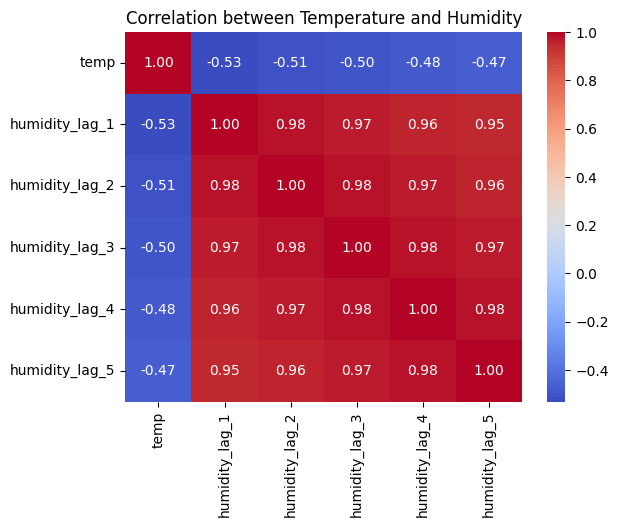

In [165]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['temp', 'humidity_lag_1', 'humidity_lag_2', 'humidity_lag_3',  'humidity_lag_4',  'humidity_lag_5']].corr()
print(correlation_matrix)

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Temperature and Humidity')
plt.show()

In [166]:
from sklearn.model_selection import train_test_split

# Defining the feature matrix and target vector
X = df[['temp_lag_1','temp_lag_2', 'temp_lag_3',  'humidity_lag_1']]
y = df['temp']  # Predicting temperature

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [167]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, BaggingRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression

# Initialize models
svr = SVR()
rf = RandomForestRegressor()
lgbm = LGBMRegressor()
bagging = BaggingRegressor(base_estimator=SVR(), n_estimators=10)

# Stacking
estimators = [('rf', RandomForestRegressor(n_estimators=10)), ('svr', SVR())]
stacking = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

# Train models
svr.fit(X_train, y_train)
rf.fit(X_train, y_train)
lgbm.fit(X_train, y_train)
bagging.fit(X_train, y_train)
stacking.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 936
[LightGBM] [Info] Number of data points in the train set: 2041, number of used features: 4
[LightGBM] [Info] Start training from score 38.722277


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


StackingRegressor(estimators=[('rf', RandomForestRegressor(n_estimators=10)),
                              ('svr', SVR())],
                  final_estimator=LinearRegression())

In [168]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Function to evaluate models
def evaluate_model(model, X, y):
    mse = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    return -mse.mean()

# Evaluate each model
models = [svr, rf, lgbm, bagging, stacking]
model_names = ['SVR', 'Random Forest', 'LightGBM', 'Bagging', 'Stacking']
scores = {name: evaluate_model(model, X_train, y_train) for name, model in zip(model_names, models)}

# Print evaluation scores
print(scores)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 937
[LightGBM] [Info] Number of data points in the train set: 1632, number of used features: 4
[LightGBM] [Info] Start training from score 38.723376
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 939
[LightGBM] [Info] Number of data points in the train set: 1633, number of used features: 4
[LightGBM] [Info] Start training from score 38.725950
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 931
[LightGBM] [Info] Number of data points in the train set: 1633, number of used features: 4
[LightGBM] [Info] Start training f

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


{'SVR': 0.07074784045111934, 'Random Forest': 0.07632410727393342, 'LightGBM': 0.07784240682474282, 'Bagging': 0.07090062924413434, 'Stacking': 0.07043270583351355}


In [169]:
from sklearn.metrics import mean_squared_error
# Predictions
predictions_svr = svr.predict(X_test)
predictions_rf = rf.predict(X_test)
predictions_lgbm = lgbm.predict(X_test)
predictions_bagging = bagging.predict(X_test)
predictions_stacking = stacking.predict(X_test)

# Calculate MSE for each model
mse_svr = mean_squared_error(y_test, predictions_svr)
mse_rf = mean_squared_error(y_test, predictions_rf)
mse_lgbm = mean_squared_error(y_test, predictions_lgbm)
mse_bagging = mean_squared_error(y_test, predictions_bagging)
mse_stacking = mean_squared_error(y_test, predictions_stacking)

# Print MSE scores
print(f'SVR MSE: {mse_svr}')
print(f'Random Forest MSE: {mse_rf}')
print(f'LightGBM MSE: {mse_lgbm}')
print(f'Bagging MSE: {mse_bagging}')
print(f'Stacking MSE: {mse_stacking}')

SVR MSE: 0.07369172129298168
Random Forest MSE: 0.07758694077308514
LightGBM MSE: 0.08119140897084749
Bagging MSE: 0.07379214345630676
Stacking MSE: 0.07189694350294781


In [170]:
X_train

,temp_lag_1,temp_lag_2,temp_lag_3,humidity_lag_1
1078,39.27,39.33,38.75,45.96
91,38.01,37.96,38.18,50.97
2406,38.74,38.39,38.78,52.18
783,38.90,39.14,38.93,46.67
848,39.36,39.19,39.29,45.64
...,...,...,...,...
1645,39.64,39.63,39.61,52.22
1102,38.94,37.11,38.96,50.96
1137,39.21,39.15,39.15,50.34
1301,38.53,38.50,38.55,53.18


In [ ]:
stacking.predict(X_train)

array([39.19680733, 38.05543624, 38.69722955, ..., 39.15866547,
       38.57962086, 39.26300688])

In [171]:
import joblib

# Export the trained model for use in online prediction.
stack_temp_columns = list(X_train)
print(stack_temp_column)
joblib.dump(stack_temp_columns, 'stack_temp_columns.pkl')
joblib.dump(stacking, 'stacking_temp_model.pkl')
print('Model dumped')

['temp_lag_1', 'temp_lag_2', 'temp_lag_3', 'humidity_lag_1']
Model dumped


            humidity  temp_lag_1  temp_lag_2  temp_lag_3  temp_lag_4  \
humidity    1.000000   -0.539806   -0.525809   -0.514307   -0.502034   
temp_lag_1 -0.539806    1.000000    0.922082    0.890359    0.865365   
temp_lag_2 -0.525809    0.922082    1.000000    0.921834    0.890188   
temp_lag_3 -0.514307    0.890359    0.921834    1.000000    0.921827   
temp_lag_4 -0.502034    0.865365    0.890188    0.921827    1.000000   
temp_lag_5 -0.490278    0.834755    0.865224    0.890175    0.921825   

            temp_lag_5  
humidity     -0.490278  
temp_lag_1    0.834755  
temp_lag_2    0.865224  
temp_lag_3    0.890175  
temp_lag_4    0.921825  
temp_lag_5    1.000000  


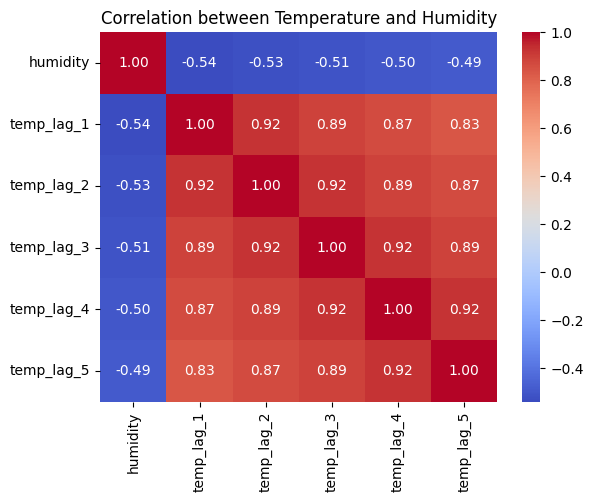

In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[[ 'humidity', 'temp_lag_1', 'temp_lag_2', 'temp_lag_3','temp_lag_4','temp_lag_5']].corr()
print(correlation_matrix)

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Temperature and Humidity')
plt.show()

In [173]:
from sklearn.model_selection import train_test_split

# Defining the feature matrix and target vector
X = df[[ 'temp_lag_1', 'humidity_lag_1', 'humidity_lag_2', 'humidity_lag_3']]
y = df['humidity']  # Predicting temperature

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [174]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, BaggingRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression

# Initialize models
svr = SVR()
rf = RandomForestRegressor(max_depth = 10, max_features = 'sqrt', n_estimators = 100)
lgbm = LGBMRegressor()
bagging = BaggingRegressor(base_estimator=SVR(), n_estimators=10)

# Stacking
estimators = [('rf', RandomForestRegressor(max_depth = 10, max_features = 'sqrt', n_estimators = 100)), ('svr', SVR())]
stacking = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

# Train models
svr.fit(X_train, y_train)
rf.fit(X_train, y_train)
lgbm.fit(X_train, y_train)
bagging.fit(X_train, y_train)
stacking.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 2041, number of used features: 4
[LightGBM] [Info] Start training from score 50.367203


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(max_depth=10,
                                                     max_features='sqrt')),
                              ('svr', SVR())],
                  final_estimator=LinearRegression())

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Example for Random Forest
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_features': ['auto', 'sqrt'],
#     'max_depth': [None, 10, 20, 30]
# }
# grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)
# print("Best parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

KeyboardInterrupt: 

In [175]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Function to evaluate models
def evaluate_model(model, X, y):
    mse = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    return -mse.mean()

# Evaluate each model
models = [svr, rf, lgbm, bagging, stacking]
model_names = ['SVR', 'Random Forest', 'LightGBM', 'Bagging', 'Stacking']
scores = {name: evaluate_model(model, X_train, y_train) for name, model in zip(model_names, models)}

# Print evaluation scores
print(scores)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 992
[LightGBM] [Info] Number of data points in the train set: 1632, number of used features: 4
[LightGBM] [Info] Start training from score 50.404599
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 990
[LightGBM] [Info] Number of data points in the train set: 1633, number of used features: 4
[LightGBM] [Info] Start training from score 50.292218
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 1633, number of used features: 4
[LightGBM] [Info] Start training f

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


{'SVR': 0.4410007214897716, 'Random Forest': 0.43680942544346346, 'LightGBM': 0.4766634192067194, 'Bagging': 0.43970677500381816, 'Stacking': 0.4261671574492233}


In [176]:
from sklearn.metrics import mean_squared_error
# Predictions
predictions_svr = svr.predict(X_test)
predictions_rf = rf.predict(X_test)
predictions_lgbm = lgbm.predict(X_test)
predictions_bagging = bagging.predict(X_test)
predictions_stacking = stacking.predict(X_test)

# Calculate MSE for each model
mse_svr = mean_squared_error(y_test, predictions_svr)
mse_rf = mean_squared_error(y_test, predictions_rf)
mse_lgbm = mean_squared_error(y_test, predictions_lgbm)
mse_bagging = mean_squared_error(y_test, predictions_bagging)
mse_stacking = mean_squared_error(y_test, predictions_stacking)

# Print MSE scores
print(f'SVR MSE: {mse_svr}')
print(f'Random Forest MSE: {mse_rf}')
print(f'LightGBM MSE: {mse_lgbm}')
print(f'Bagging MSE: {mse_bagging}')
print(f'Stacking MSE: {mse_stacking}')

SVR MSE: 0.47977544514837034
Random Forest MSE: 0.49458237165451757
LightGBM MSE: 0.5066008742067093
Bagging MSE: 0.4801781186603662
Stacking MSE: 0.47363184083472193


In [ ]:
import joblib
# Export the trained model for use in online prediction.
stack_humid_columns = list(X_train)
print(stack_humid_column)
joblib.dump(stack_humid_columns, 'stack_humid_columns.pkl')
joblib.dump(stacking, 'stacking_humid_model.pkl')
print('Model dumped')

['temp_lag_1', 'humidity_lag_1', 'humidity_lag_2', 'humidity_lag_3']
Model dumped


In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
"""
Real-Time prediction
Retrieve streaming data from the consumer and predict the number
of people inside the room. Utilize Flask, a simple REST API server,
as the endpoint for data feeding.
"""

# Importing relevant modules
import joblib
import pandas as pd

import json

# Load the trained model
knn_model = joblib.load('stacking_temp_model.pkl')
model_columns = joblib.load("stack_temp_columns.pkl")

df = {'temp_lag_3': 33.71, 'temp_lag_2': 33.73, 'temp_lag_1': 33.75, 'humidity_lag_1': 51.53}
df1 = pd.DataFrame([df])

knn_model.predict(df1)
X_train.iloc[[1]]

df1

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.
